
Time Series Decomposition:


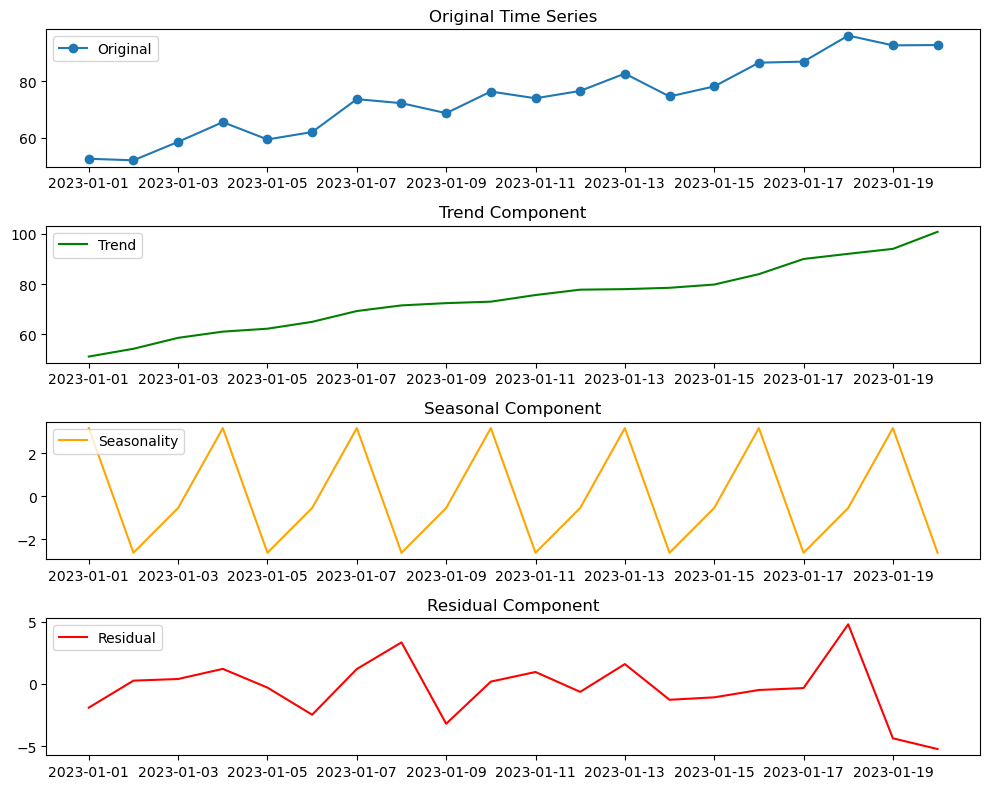


Stationarity Tests on Original Series:
Running Augmented Dickey-Fuller (ADF) Test...
ADF Statistic: 0.05480394617791605
p-value: 0.9628363921597566
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
ADF Test Conclusion: The series is non-stationary based on the ADF test.

Running Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test...
KPSS Statistic: 0.7455845277276658
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS Test Conclusion: The series is non-stationary based on the KPSS test.

Autocorrelation Plot:


C:\Users\vijay\AppData\Local\Temp\ipykernel_5760\2321368780.py:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


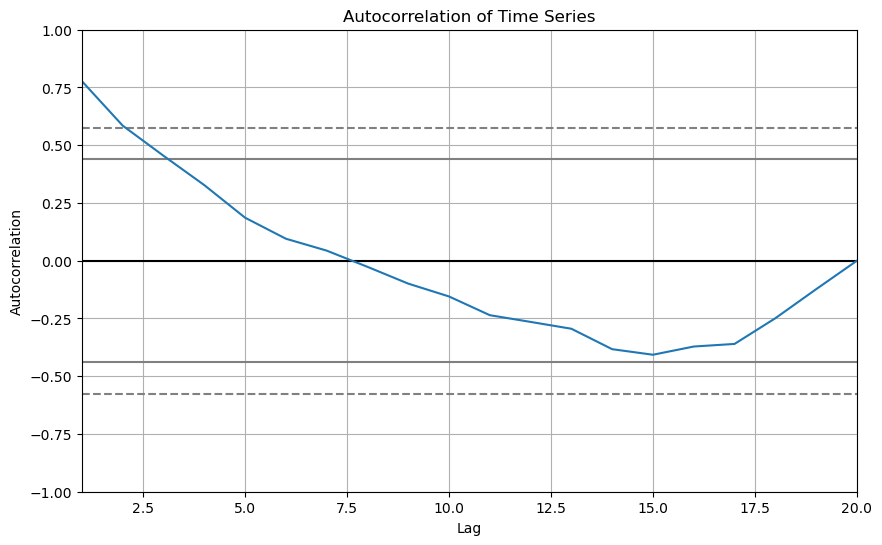


Stationarity Tests on Differenced Series:
Running Augmented Dickey-Fuller (ADF) Test...
ADF Statistic: -3.430615466609437
p-value: 0.009958429295541266
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
ADF Test Conclusion: The series is stationary based on the ADF test.

Running Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test...
KPSS Statistic: 0.19381881808119353
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS Test Conclusion: The series is stationary based on the KPSS test.

Autocorrelation Plot for Differenced Series:


C:\Users\vijay\AppData\Local\Temp\ipykernel_5760\2321368780.py:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


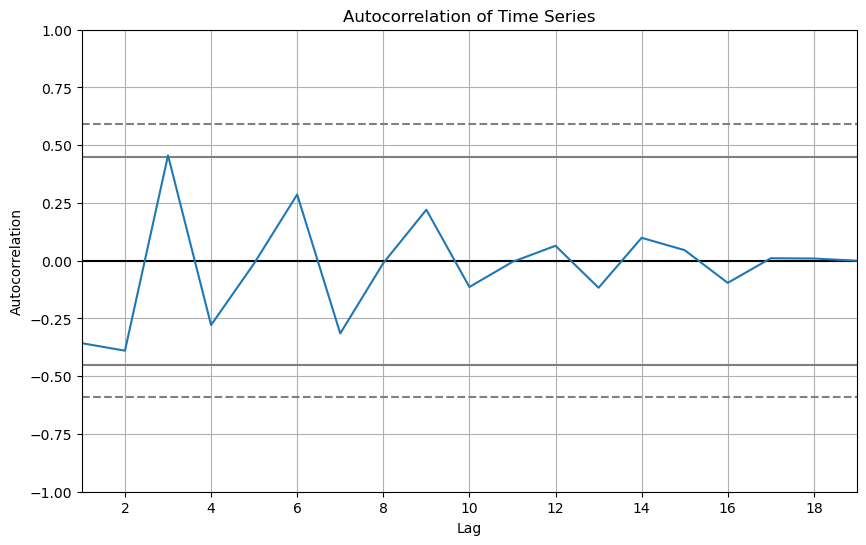

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

def generate_sample_data(n_points=20):
    """Generates a sample time series data."""
    np.random.seed(42)  # For reproducibility
    dates = pd.date_range(start='2023-01-01', periods=n_points, freq='D')
    # Generate a time series with a simple linear trend plus some random noise
    trend = np.linspace(50, 100, n_points)  # Linear trend from 50 to 100
    noise = np.random.normal(0, 5, n_points)  # Add some noise with mean=0 and std=5
    values = trend + noise
    data = pd.DataFrame({'date': dates, 'value': values})
    data.set_index('date', inplace=True)
    return data

def test_stationarity(series):
    """Performs both ADF and KPSS tests to check stationarity."""
    print("Running Augmented Dickey-Fuller (ADF) Test...")
    adf_result = adfuller(series)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Critical Values: {adf_result[4]}")
    if adf_result[1] < 0.05:
        print("ADF Test Conclusion: The series is stationary based on the ADF test.")
    else:
        print("ADF Test Conclusion: The series is non-stationary based on the ADF test.")
    
    print("\nRunning Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test...")
    kpss_result = kpss(series, regression='c', nlags='auto')
    print(f"KPSS Statistic: {kpss_result[0]}")
    print(f"p-value: {kpss_result[1]}")
    print(f"Critical Values: {kpss_result[3]}")
    if kpss_result[1] < 0.05:
        print("KPSS Test Conclusion: The series is non-stationary based on the KPSS test.")
    else:
        print("KPSS Test Conclusion: The series is stationary based on the KPSS test.")

def plot_autocorrelation(data):
    """Plots the autocorrelation of the time series."""
    plt.figure(figsize=(10, 6))
    autocorrelation_plot(data)
    plt.title('Autocorrelation of Time Series')
    plt.show()

def plot_time_series_decomposition(data):
    """Plots the time series decomposition into trend, seasonal, and residual components."""
    decomposition = seasonal_decompose(data, period=3, model='additive', extrapolate_trend='freq')
    plt.figure(figsize=(10, 8))
    
    plt.subplot(411)
    plt.plot(data, label='Original', marker='o', linestyle='-')
    plt.legend(loc='upper left')
    plt.title('Original Time Series')
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='green')
    plt.legend(loc='upper left')
    plt.title('Trend Component')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
    plt.legend(loc='upper left')
    plt.title('Seasonal Component')
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual', color='red')
    plt.legend(loc='upper left')
    plt.title('Residual Component')
    
    plt.tight_layout()
    plt.show()

def differencing(data):
    """Applies differencing to the time series to make it stationary."""
    return data.diff().dropna()

def main():
    # Generate sample time series data with 20 data points
    data = generate_sample_data(n_points=20)

    # Visual Inspection (Time Series Decomposition)
    print("\nTime Series Decomposition:")
    plot_time_series_decomposition(data['value'])

    # Perform Stationarity Tests (ADF and KPSS) on the Original Series
    print("\nStationarity Tests on Original Series:")
    test_stationarity(data['value'])

    # Autocorrelation Plot for Stationarity Check
    print("\nAutocorrelation Plot:")
    plot_autocorrelation(data['value'])

    # Differencing the Time Series to Achieve Stationarity
    data_diff = differencing(data['value'])

    # Perform Stationarity Tests on the Differenced Series
    print("\nStationarity Tests on Differenced Series:")
    test_stationarity(data_diff)

    # Autocorrelation Plot for Differenced Series
    print("\nAutocorrelation Plot for Differenced Series:")
    plot_autocorrelation(data_diff)

if __name__ == '__main__':
    main()